<div style='font-size:100%;'>
    <a id='import'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center>Importing the necessary libraries</center>
    </h1>
</div>

In [2]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os
from IPython.display import Image
import tensorflow.keras.backend as K
import splitfolders
import pandas as pd
import numpy as np
import seaborn as sns

<div style='font-size:100%;'>
    <a id='methodology'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center>Proposed Methodology</center>
    </h1>
</div>

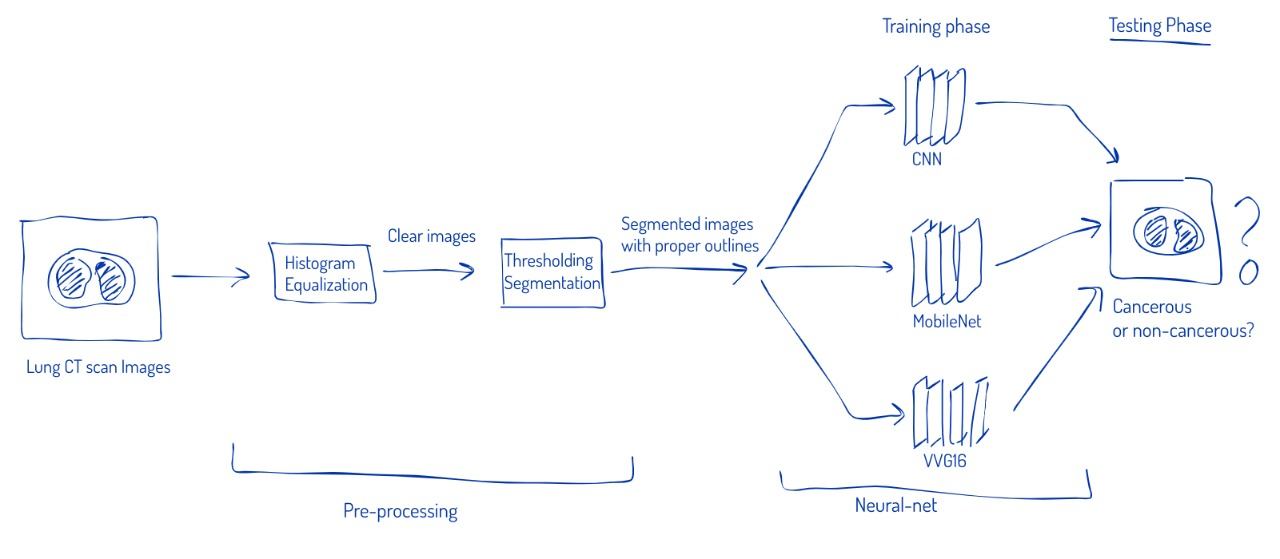

In [51]:
Image(filename='./methodology.jpeg') 

<div style='font-size:100%;'>
    <a id='preprocess'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center>Data Pre-processing</center>
    </h1>
</div>

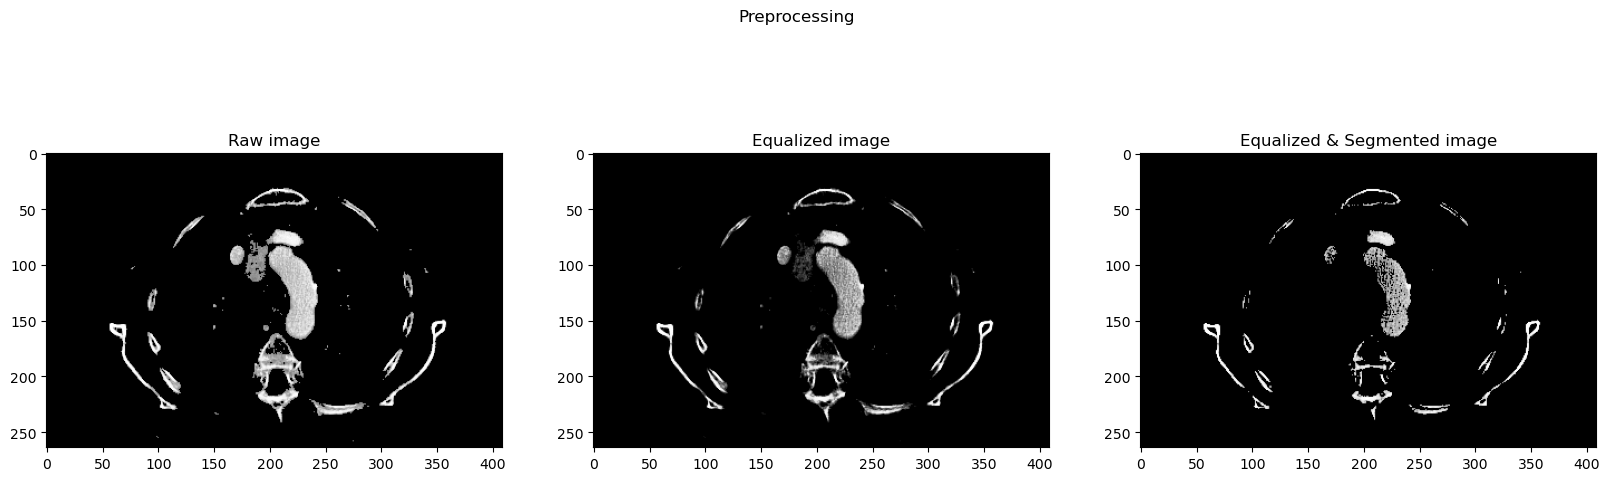

In [3]:
img = cv2.imread('./rawData/adenocarcinoma/adenocarcinoma1.png', 0)
equalizedImage = cv2.equalizeHist(img)
e, segmentedImage = cv2.threshold(equalizedImage, 128, 255, cv2.THRESH_TOZERO)

plt.figure(figsize=(20, 6))

ax1 = plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Raw image')

ax2 = plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(equalizedImage, cv2.COLOR_BGR2RGB))
ax2.set_title('Equalized image')

ax3 = plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(segmentedImage, cv2.COLOR_BGR2RGB))
ax3.set_title('Equalized & Segmented image')

plt.suptitle('Preprocessing')

plt.show()

In [4]:
print(os.getcwd(), os.listdir())
DIR = './rawData'
CATS = ['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']

DEST_DIR = './data'

C:\Users\mayur\Downloads\lung-cancer-detection-main\lung-cancer-detection-main ['.ipynb_checkpoints', 'avengers.ipynb', 'best_model.h5', 'CNN.h5', 'CNN.png', 'CNN1.h5', 'data', 'eval.txt', 'InceptionV3.png', 'lung.py', 'Lung_Cncer_Detection_Model.ipynb', 'methodology.jpeg', 'min.hdf5', 'mini.hdf5', 'mini_project.hdf5', 'MOBILENET.h5', 'MOBILENET.png', 'model.h5', 'model1.h5', 'model_version3.hdf5', 'notebook.ipynb', 'processedData', 'rawData', 'README.md', 'ResNet50.png', 'Untitled.ipynb', 'Untitled1.ipynb', 'Untitled2.ipynb', 'Untitled3.ipynb', 'VGG16.h5', 'VGG16.hdf5', 'VGG16.png', 'VGG19.png', 'Xception.png']


<div style='font-size:100%;'>
    <a id='comparison'></a>
    <h1 style='color: gray; font-weight: bold; font-family: Cascadia code;'>
        <center>Comparison between processed and unprocessed image</center>
    </h1>
</div>

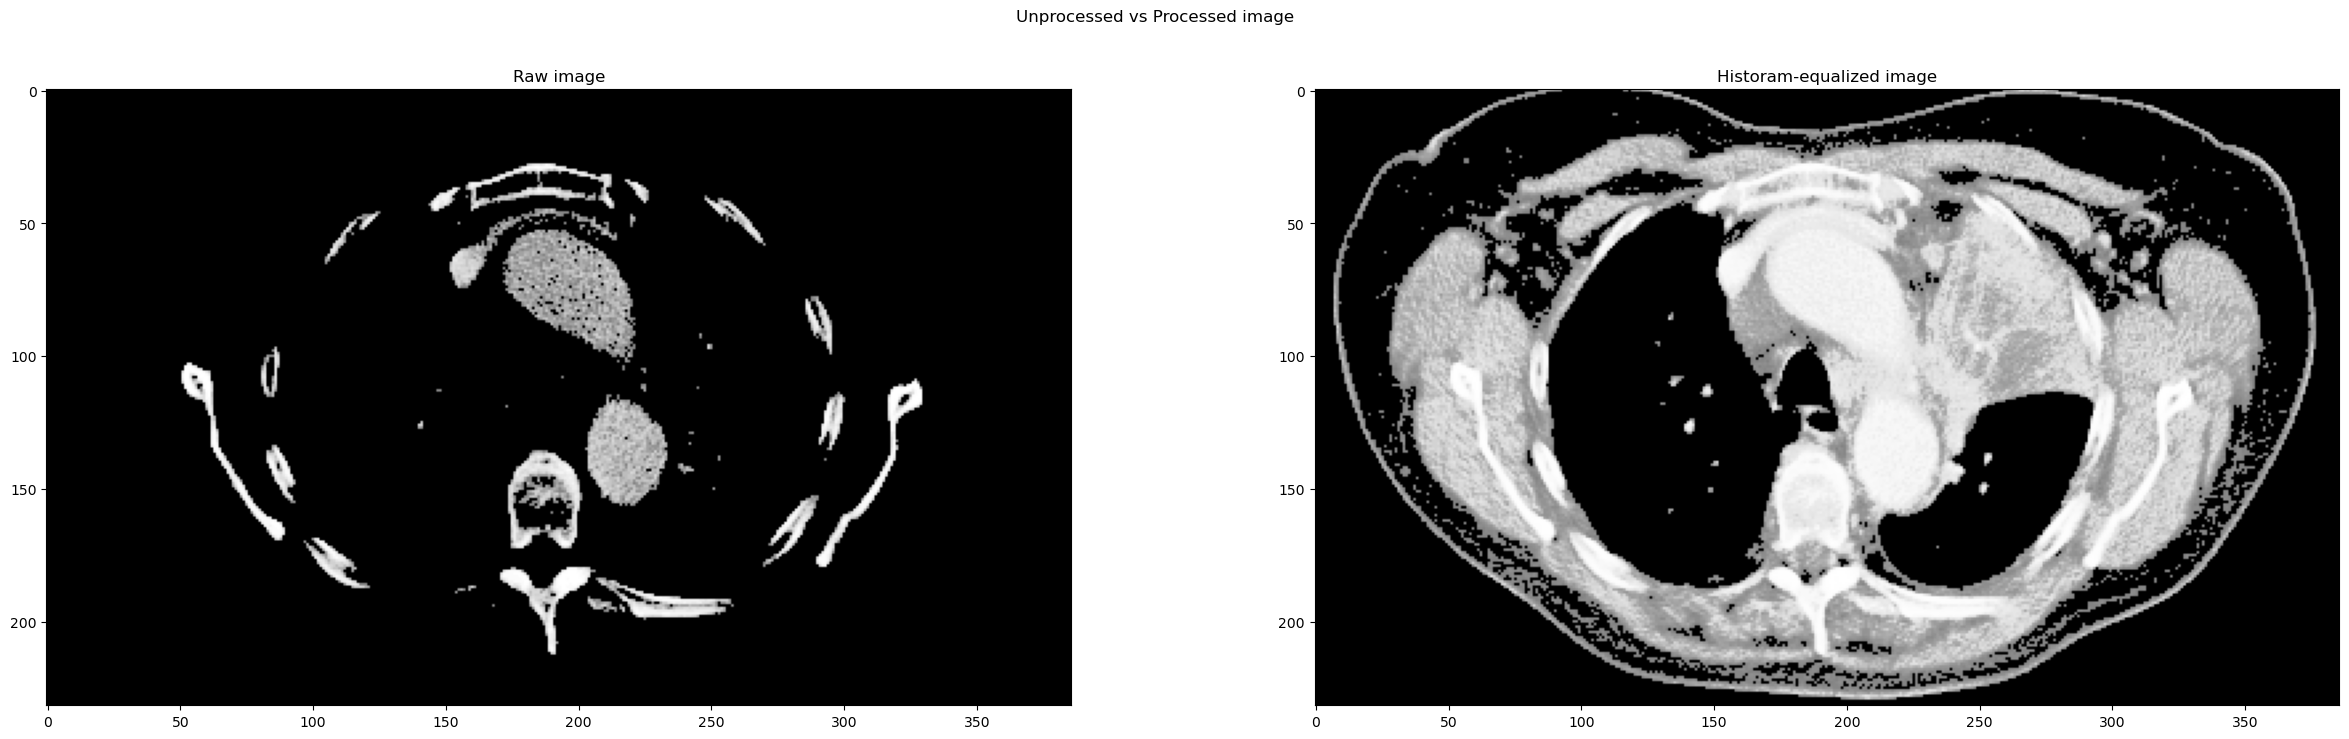

In [5]:
plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(os.path.join(DIR, CATS[0], 'adenocarcinoma10.png')))
plt.title('Raw image')
plt.subplot(1, 2, 2)
plt.imshow(cv2.imread(os.path.join(DEST_DIR,'cancerous', 'adenocarcinoma10.png')))
plt.title('Historam-equalized image')
plt.suptitle('Unprocessed vs Processed image')
plt.show()

In [6]:
BATCH_SIZE=32


train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, validation_split = 0.2,                  
                                                                rotation_range=5,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                shear_range=0.2,
                                                                horizontal_flip=True,
                                                                vertical_flip=True,
                                                                fill_mode='nearest'
                                                                )

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

test_datagen  = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [7]:
train_dataset  = train_datagen.flow_from_directory(directory = 'processedData/train',
                                                   target_size = (224,224),
                                                   class_mode = 'binary',
                                                   batch_size = 32)

Found 699 images belonging to 2 classes.


In [8]:
valid_dataset = valid_datagen.flow_from_directory(directory = 'processedData/val',
                                                  target_size = (224,224),
                                                  class_mode = 'binary',
                                                  batch_size = 32)

Found 99 images belonging to 2 classes.


In [9]:
test_dataset = test_datagen.flow_from_directory(directory = 'processedData/test',
                                                  target_size = (224,224),
                                                  class_mode = 'binary',
                                                  batch_size = 32)

Found 216 images belonging to 2 classes.


['cancerous', 'non-cancerous']


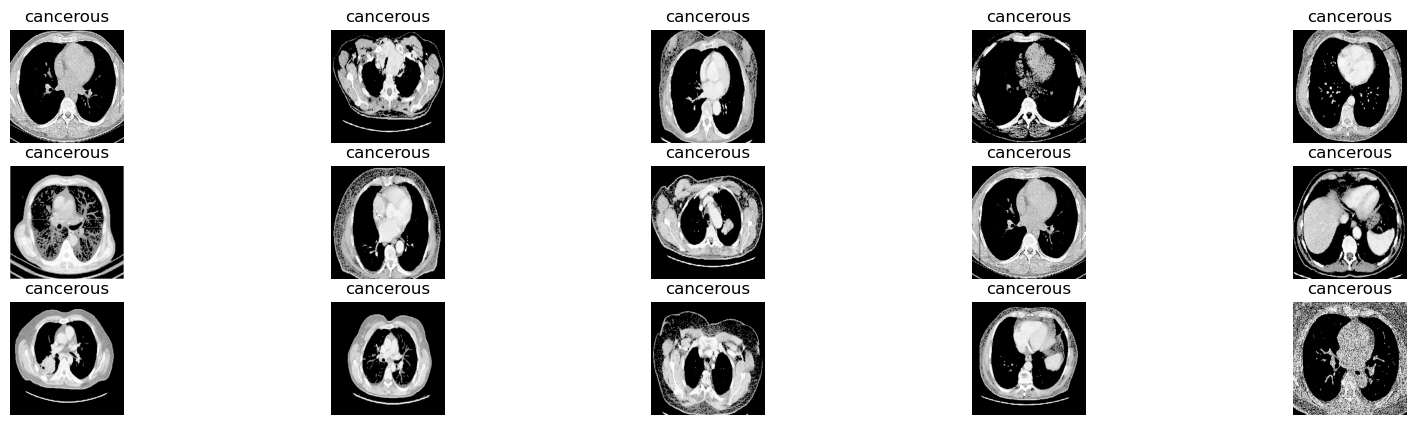

In [10]:
class_names=list(test_dataset.class_indices.keys())
print(class_names)

fig = plt.figure(figsize=(20,5))

image_batch,label_batch = test_dataset[1]
for i in range(15):
    ax = fig.add_subplot(3,5,i+1,xticks = [], yticks = [])
    ax.imshow(image_batch[i])
    plt.axis('off')
    plt.title(class_names[np.argmax(label_batch[i])])

<h1 align="center" ><a id='CNN'><b>CNN<b></a></h1>

In [12]:
CNN = tf.keras.Sequential()
CNN.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
CNN.add(tf.keras.layers.Conv2D(filters=36, kernel_size=(3, 3), activation='relu'))
CNN.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
CNN.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
CNN.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
CNN.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
CNN.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
CNN.add(tf.keras.layers.Dropout(rate=0.25))
CNN.add(tf.keras.layers.Flatten())
CNN.add(tf.keras.layers.Dense(units=64, activation='relu'))
CNN.add(tf.keras.layers.Dropout(rate=0.25))
CNN.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

CNN.summary()

CNN.compile(optimizer='adam',
              loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 36)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


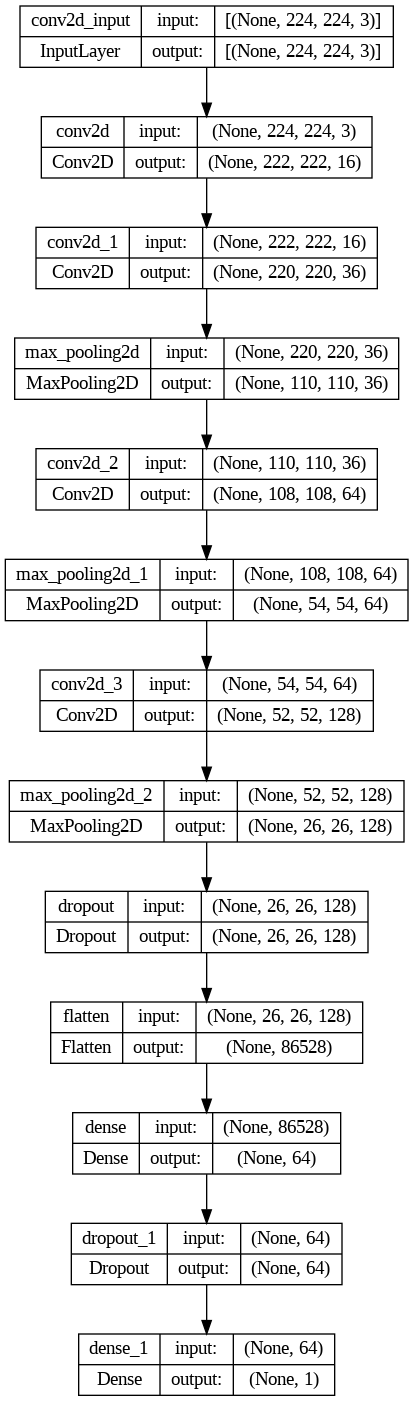

In [15]:
tf.keras.utils.plot_model(CNN, to_file='CNN.png', show_shapes=True,show_layer_names=True)
Image(filename='CNN.png')

In [16]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('CNN.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

CNN_history = CNN.fit(train_dataset,validation_data=valid_dataset, epochs = 10,verbose = 1, callbacks=[lrd,mcp,es], shuffle=True)

Epoch 1/10
22/22 [==============================] - 57s 2s/step - loss: 0.6383 - accuracy: 0.7740 - val_loss: 0.5068 - val_accuracy: 0.7879 - lr: 0.0010
Epoch 2/10


C:\Users\mayur\anaconda3.0\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


22/22 [==============================] - 54s 2s/step - loss: 0.4917 - accuracy: 0.7854 - val_loss: 0.4072 - val_accuracy: 0.7879 - lr: 0.0010
Epoch 3/10
22/22 [==============================] - 53s 2s/step - loss: 0.4819 - accuracy: 0.7797 - val_loss: 0.3854 - val_accuracy: 0.8081 - lr: 0.0010
Epoch 4/10
22/22 [==============================] - 53s 2s/step - loss: 0.4520 - accuracy: 0.7883 - val_loss: 0.3568 - val_accuracy: 0.8182 - lr: 0.0010
Epoch 5/10
22/22 [==============================] - 54s 2s/step - loss: 0.3804 - accuracy: 0.8355 - val_loss: 0.2803 - val_accuracy: 0.9091 - lr: 0.0010
Epoch 6/10
22/22 [==============================] - 51s 2s/step - loss: 0.3917 - accuracy: 0.8340 - val_loss: 0.5211 - val_accuracy: 0.7374 - lr: 0.0010
Epoch 7/10
22/22 [==============================] - 52s 2s/step - loss: 0.3085 - accuracy: 0.8655 - val_loss: 0.2045 - val_accuracy: 0.9192 - lr: 0.0010
Epoch 8/10
22/22 [==============================] - 54s 2s/step - loss: 0.3037 - accuracy: 0.

In [17]:
CNN_scores = CNN.evaluate(test_dataset, verbose=1)

7/7 [==============================] - 2s 303ms/step - loss: 0.1053 - accuracy: 0.9752


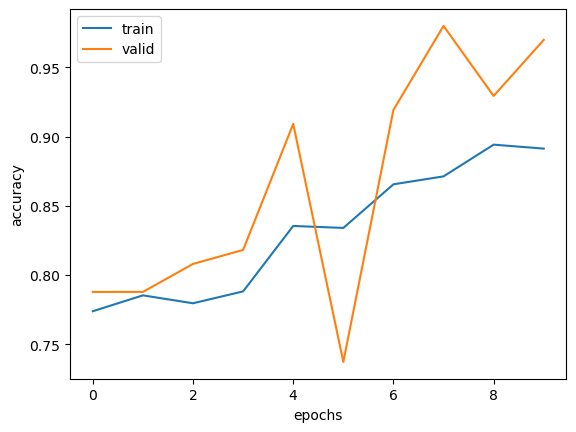

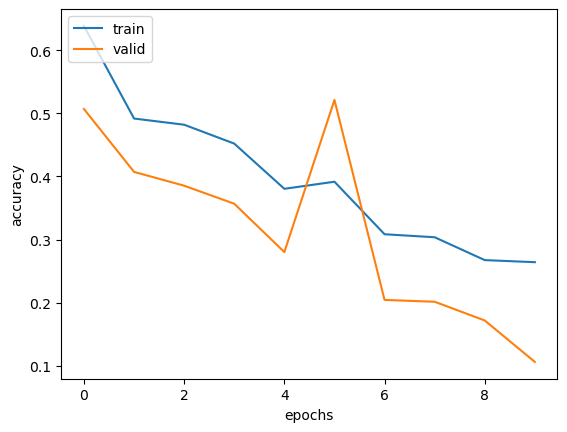

In [52]:
import matplotlib.pyplot as plt
plt.plot(CNN_history.history['accuracy'], label = 'train',)
plt.plot(CNN_history.history['val_accuracy'], label = 'valid')

plt.legend(loc = 'upper left')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()


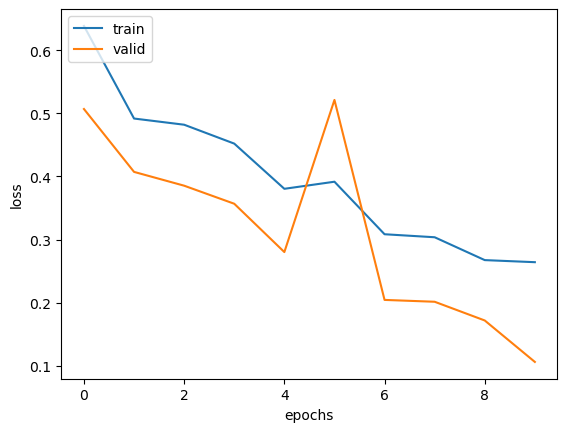

In [54]:
plt.plot(CNN_history.history['loss'], label = 'train',)
plt.plot(CNN_history.history['val_loss'], label = 'valid')

plt.legend(loc = 'upper left')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [20]:
CNN.save('CNN.h5')

1/1 [==============================] - 0s 32ms/step


array([[1.]], dtype=float32)

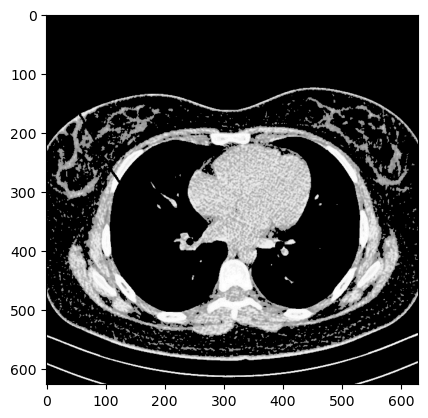

In [25]:
img=cv2.imread('data/non-cancerous/normal1.png')
plt.imshow(img,cmap=plt.get_cmap('gray'))
img=cv2.resize(img,(224,224))
img=img.reshape((1,224,224,3))
CNN.predict(img)

In [64]:
<h1 align="center" ><a id='vgg16'><b>VGG16<b></a></h1>

SyntaxError: invalid syntax (3584745191.py, line 1)

In [14]:
VGG16_base = tf.keras.applications.VGG16(input_shape=(224,224,3),include_top=False,weights="imagenet")

for layer in VGG16_base.layers:
    layer.trainable = False

VGG16=tf.keras.Sequential()
VGG16.add(VGG16_base)
VGG16.add(tf.keras.layers.Dropout(0.5))
VGG16.add(tf.keras.layers.Flatten())
VGG16.add(tf.keras.layers.BatchNormalization())
VGG16.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
VGG16.add(tf.keras.layers.BatchNormalization())
VGG16.add(tf.keras.layers.Activation('relu'))
VGG16.add(tf.keras.layers.Dropout(0.5))
VGG16.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
VGG16.add(tf.keras.layers.BatchNormalization())
VGG16.add(tf.keras.layers.Activation('relu'))
VGG16.add(tf.keras.layers.Dropout(0.5))
VGG16.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
VGG16.add(tf.keras.layers.BatchNormalization())
VGG16.add(tf.keras.layers.Activation('relu'))
VGG16.add(tf.keras.layers.Dense(1,activation='sigmoid'))

VGG16.summary()

VGG16.compile(optimizer='rmsprop',
              loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 512)         0         
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 batch_normalization (Batch  (None, 25088)             100352    
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 32)                802848    
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                     

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


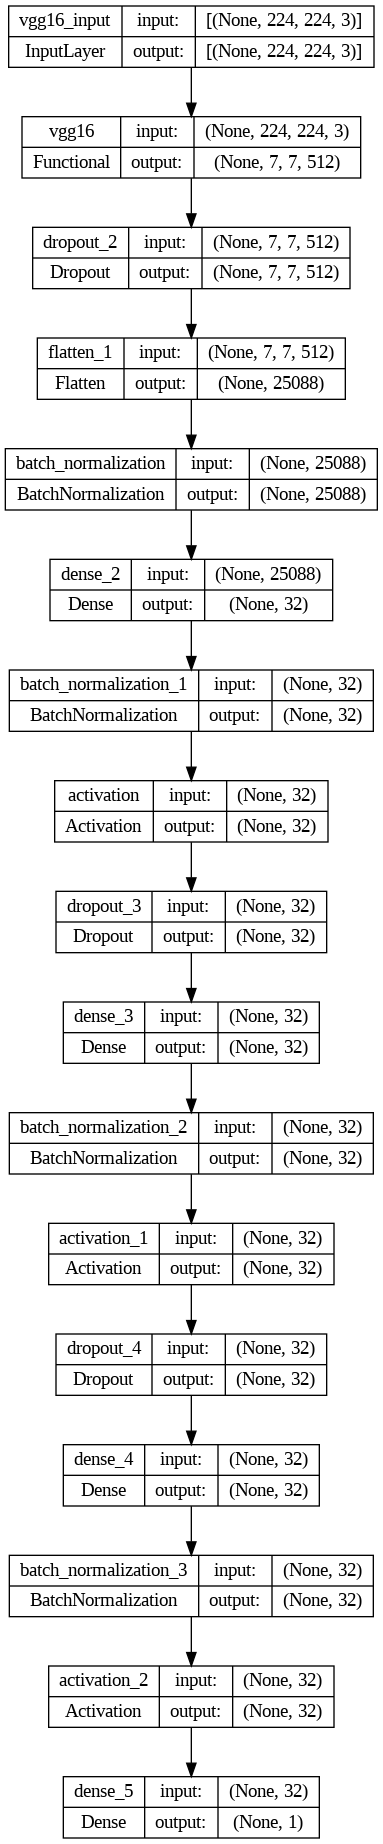

In [27]:
tf.keras.utils.plot_model(VGG16, to_file='VGG16.png', show_shapes=True,show_layer_names=True)
Image(filename='VGG16.png')

In [28]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('VGG16.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

VGG16_history = VGG16.fit(train_dataset,validation_data=valid_dataset, epochs = 10, callbacks=[lrd,mcp,es], shuffle=True)

Epoch 1/10
22/22 [==============================] - 81s 4s/step - loss: 0.6025 - accuracy: 0.7024 - val_loss: 0.5293 - val_accuracy: 0.7879 - lr: 0.0010
Epoch 2/10
22/22 [==============================] - 70s 3s/step - loss: 0.4971 - accuracy: 0.8054 - val_loss: 0.4128 - val_accuracy: 0.7879 - lr: 0.0010
Epoch 3/10
22/22 [==============================] - 69s 3s/step - loss: 0.4679 - accuracy: 0.8126 - val_loss: 0.3812 - val_accuracy: 0.8081 - lr: 0.0010
Epoch 4/10
22/22 [==============================] - 68s 3s/step - loss: 0.3991 - accuracy: 0.8412 - val_loss: 0.3564 - val_accuracy: 0.8182 - lr: 0.0010
Epoch 5/10
22/22 [==============================] - 67s 3s/step - loss: 0.3718 - accuracy: 0.8498 - val_loss: 0.2636 - val_accuracy: 0.8788 - lr: 0.0010
Epoch 6/10
22/22 [==============================] - 67s 3s/step - loss: 0.3233 - accuracy: 0.8684 - val_loss: 0.2269 - val_accuracy: 0.9293 - lr: 0.0010
Epoch 7/10
22/22 [==============================] - 68s 3s/step - loss: 0.3025 - a

In [29]:
VGG16_scores = VGG16.evaluate(test_dataset, verbose=1)

7/7 [==============================] - 19s 2s/step - loss: 0.0979 - accuracy: 0.9802


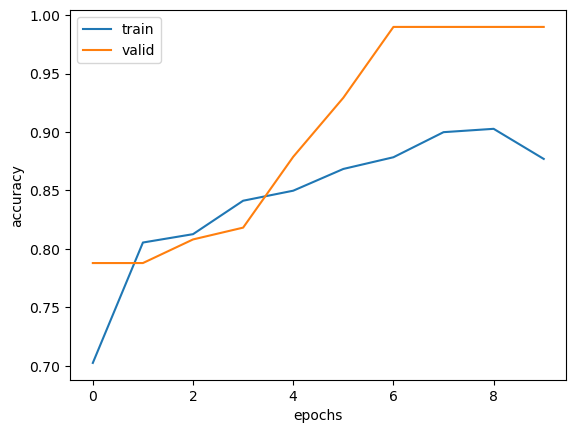

In [30]:
import matplotlib.pyplot as plt
plt.plot(VGG16_history.history['accuracy'], label = 'train',)
plt.plot(VGG16_history.history['val_accuracy'], label = 'valid')

plt.legend(loc = 'upper left')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

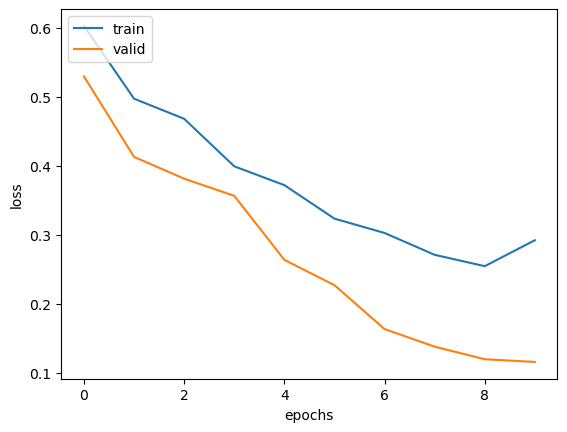

In [55]:
plt.plot(VGG16_history.history['loss'], label = 'train',)
plt.plot(VGG16_history.history['val_loss'], label = 'valid')

plt.legend(loc = 'upper left')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [32]:
VGG16.save('VGG16.h5')

<h1 align="center" ><a id='MOBILENET'><b>MOBILENET<b></a></h1>

In [15]:
MOBILENET_base =  tf.keras.applications.MobileNet(input_shape=(224,224,3), include_top= False)

for layer in MOBILENET_base.layers:
    layer.trainable = False

MOBILENET=tf.keras.Sequential()
MOBILENET.add(MOBILENET_base)
MOBILENET.add(tf.keras.layers.Dropout(0.5))
MOBILENET.add(tf.keras.layers.Flatten())
MOBILENET.add(tf.keras.layers.BatchNormalization())
MOBILENET.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
MOBILENET.add(tf.keras.layers.BatchNormalization())
MOBILENET.add(tf.keras.layers.Activation('relu'))
MOBILENET.add(tf.keras.layers.Dropout(0.5))
MOBILENET.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
MOBILENET.add(tf.keras.layers.BatchNormalization())
MOBILENET.add(tf.keras.layers.Activation('relu'))
MOBILENET.add(tf.keras.layers.Dropout(0.5))
MOBILENET.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
MOBILENET.add(tf.keras.layers.BatchNormalization())
MOBILENET.add(tf.keras.layers.Activation('relu'))
MOBILENET.add(tf.keras.layers.Dense(1,activation='sigmoid'))

MOBILENET.summary()

MOBILENET.compile(optimizer='rmsprop',
              loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 7, 7, 1024)        0         
                                                                 
 flatten_2 (Flatten)         (None, 50176)             0         
                                                                 
 batch_normalization_4 (Bat  (None, 50176)             200704    
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 32)                1605664   
                                                                 
 batch_normalization_5 (Bat  (None, 32)               

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


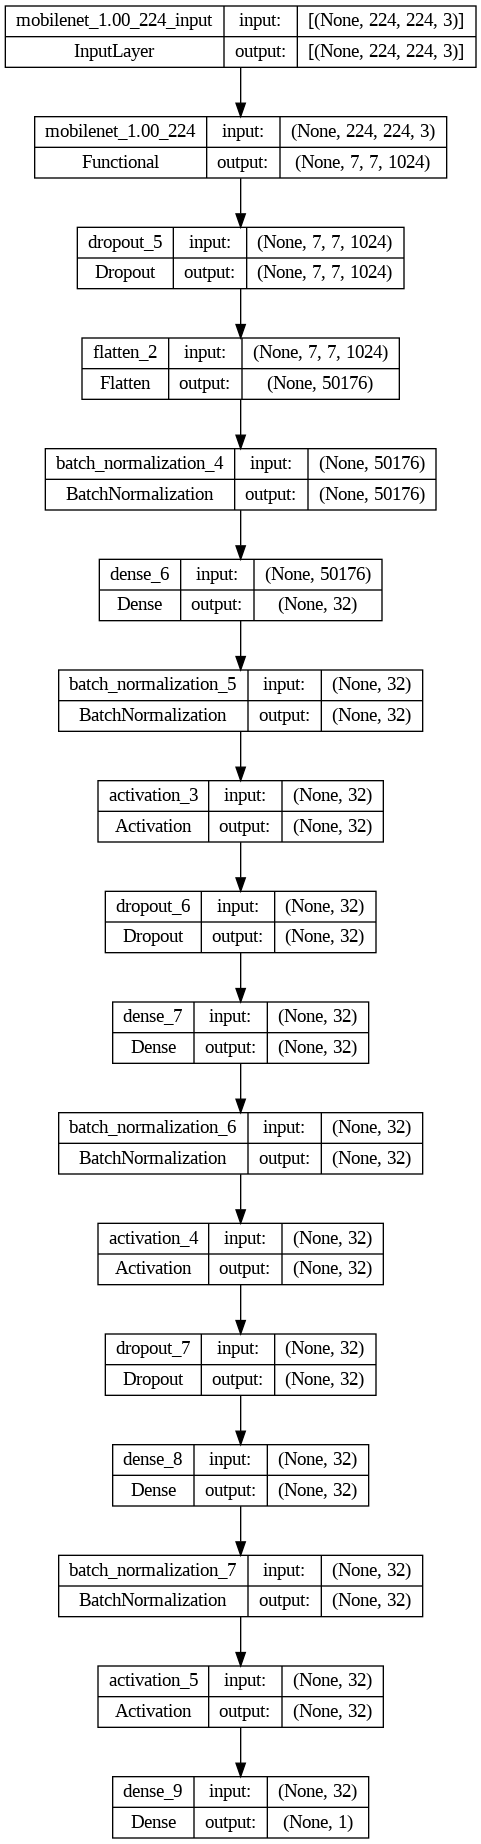

In [59]:
tf.keras.utils.plot_model(MOBILENET, to_file='MOBILENET.png', show_shapes=True,show_layer_names=True)
Image(filename='MOBILENET.png')

In [61]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('MOBILENET.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

MOBILENET_history = MOBILENET.fit(train_dataset,validation_data=valid_dataset,epochs = 10,verbose = 1, callbacks=[lrd, mcp, es], shuffle=True)

Epoch 1/10
22/22 [==============================] - 20s 900ms/step - loss: 0.7578 - accuracy: 0.5308 - val_loss: 3.6110 - val_accuracy: 0.2121 - lr: 0.0010
Epoch 2/10
22/22 [==============================] - 20s 900ms/step - loss: 0.6145 - accuracy: 0.7225 - val_loss: 2.4129 - val_accuracy: 0.3030 - lr: 0.0010
Epoch 3/10
22/22 [==============================] - 20s 926ms/step - loss: 0.4834 - accuracy: 0.8355 - val_loss: 1.0368 - val_accuracy: 0.5354 - lr: 0.0010
Epoch 4/10
22/22 [==============================] - 20s 884ms/step - loss: 0.4084 - accuracy: 0.8898 - val_loss: 0.7829 - val_accuracy: 0.6263 - lr: 0.0010
Epoch 5/10
22/22 [==============================] - 19s 883ms/step - loss: 0.3326 - accuracy: 0.9070 - val_loss: 0.3667 - val_accuracy: 0.8485 - lr: 0.0010
Epoch 6/10
22/22 [==============================] - 19s 885ms/step - loss: 0.2870 - accuracy: 0.9199 - val_loss: 0.2249 - val_accuracy: 0.9394 - lr: 0.0010
Epoch 7/10
22/22 [==============================] - 19s 866ms/st

In [74]:
MOBILENET_scores = MOBILENET.evaluate(test_dataset, verbose=1)

7/7 [==============================] - 4s 612ms/step - loss: 0.0674 - accuracy: 0.9901


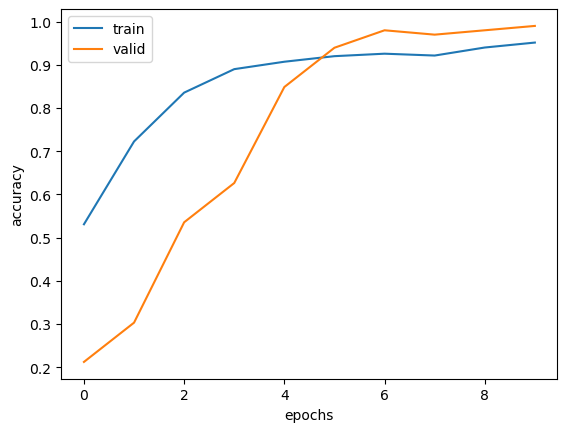

In [62]:
import matplotlib.pyplot as plt
plt.plot(MOBILENET_history.history['accuracy'], label = 'train',)
plt.plot(MOBILENET_history.history['val_accuracy'], label = 'valid')

plt.legend(loc = 'upper left')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

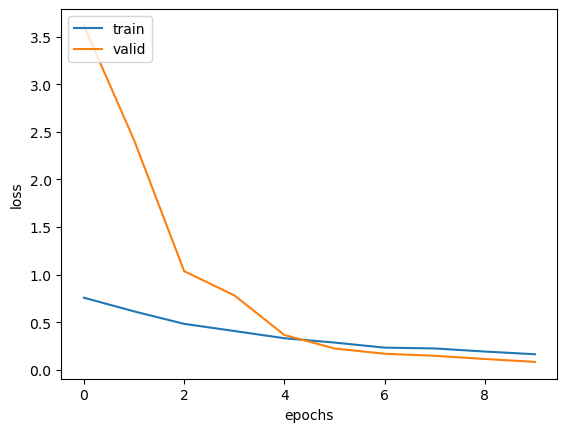

In [63]:
plt.plot(MOBILENET_history.history['loss'], label = 'train',)
plt.plot(MOBILENET_history.history['val_loss'], label = 'valid')

plt.legend(loc = 'upper left')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [42]:
img=cv2.imread('data/non-cancerous/normal1.png')
img=cv2.resize(img,(224,224))
img=img.reshape((1,224,224,3))
VGG16.predict(img)

1/1 [==============================] - 0s 87ms/step


array([[0.]], dtype=float32)

# Example: Prediction vs Truth

1/1 [==============================] - 0s 49ms/step


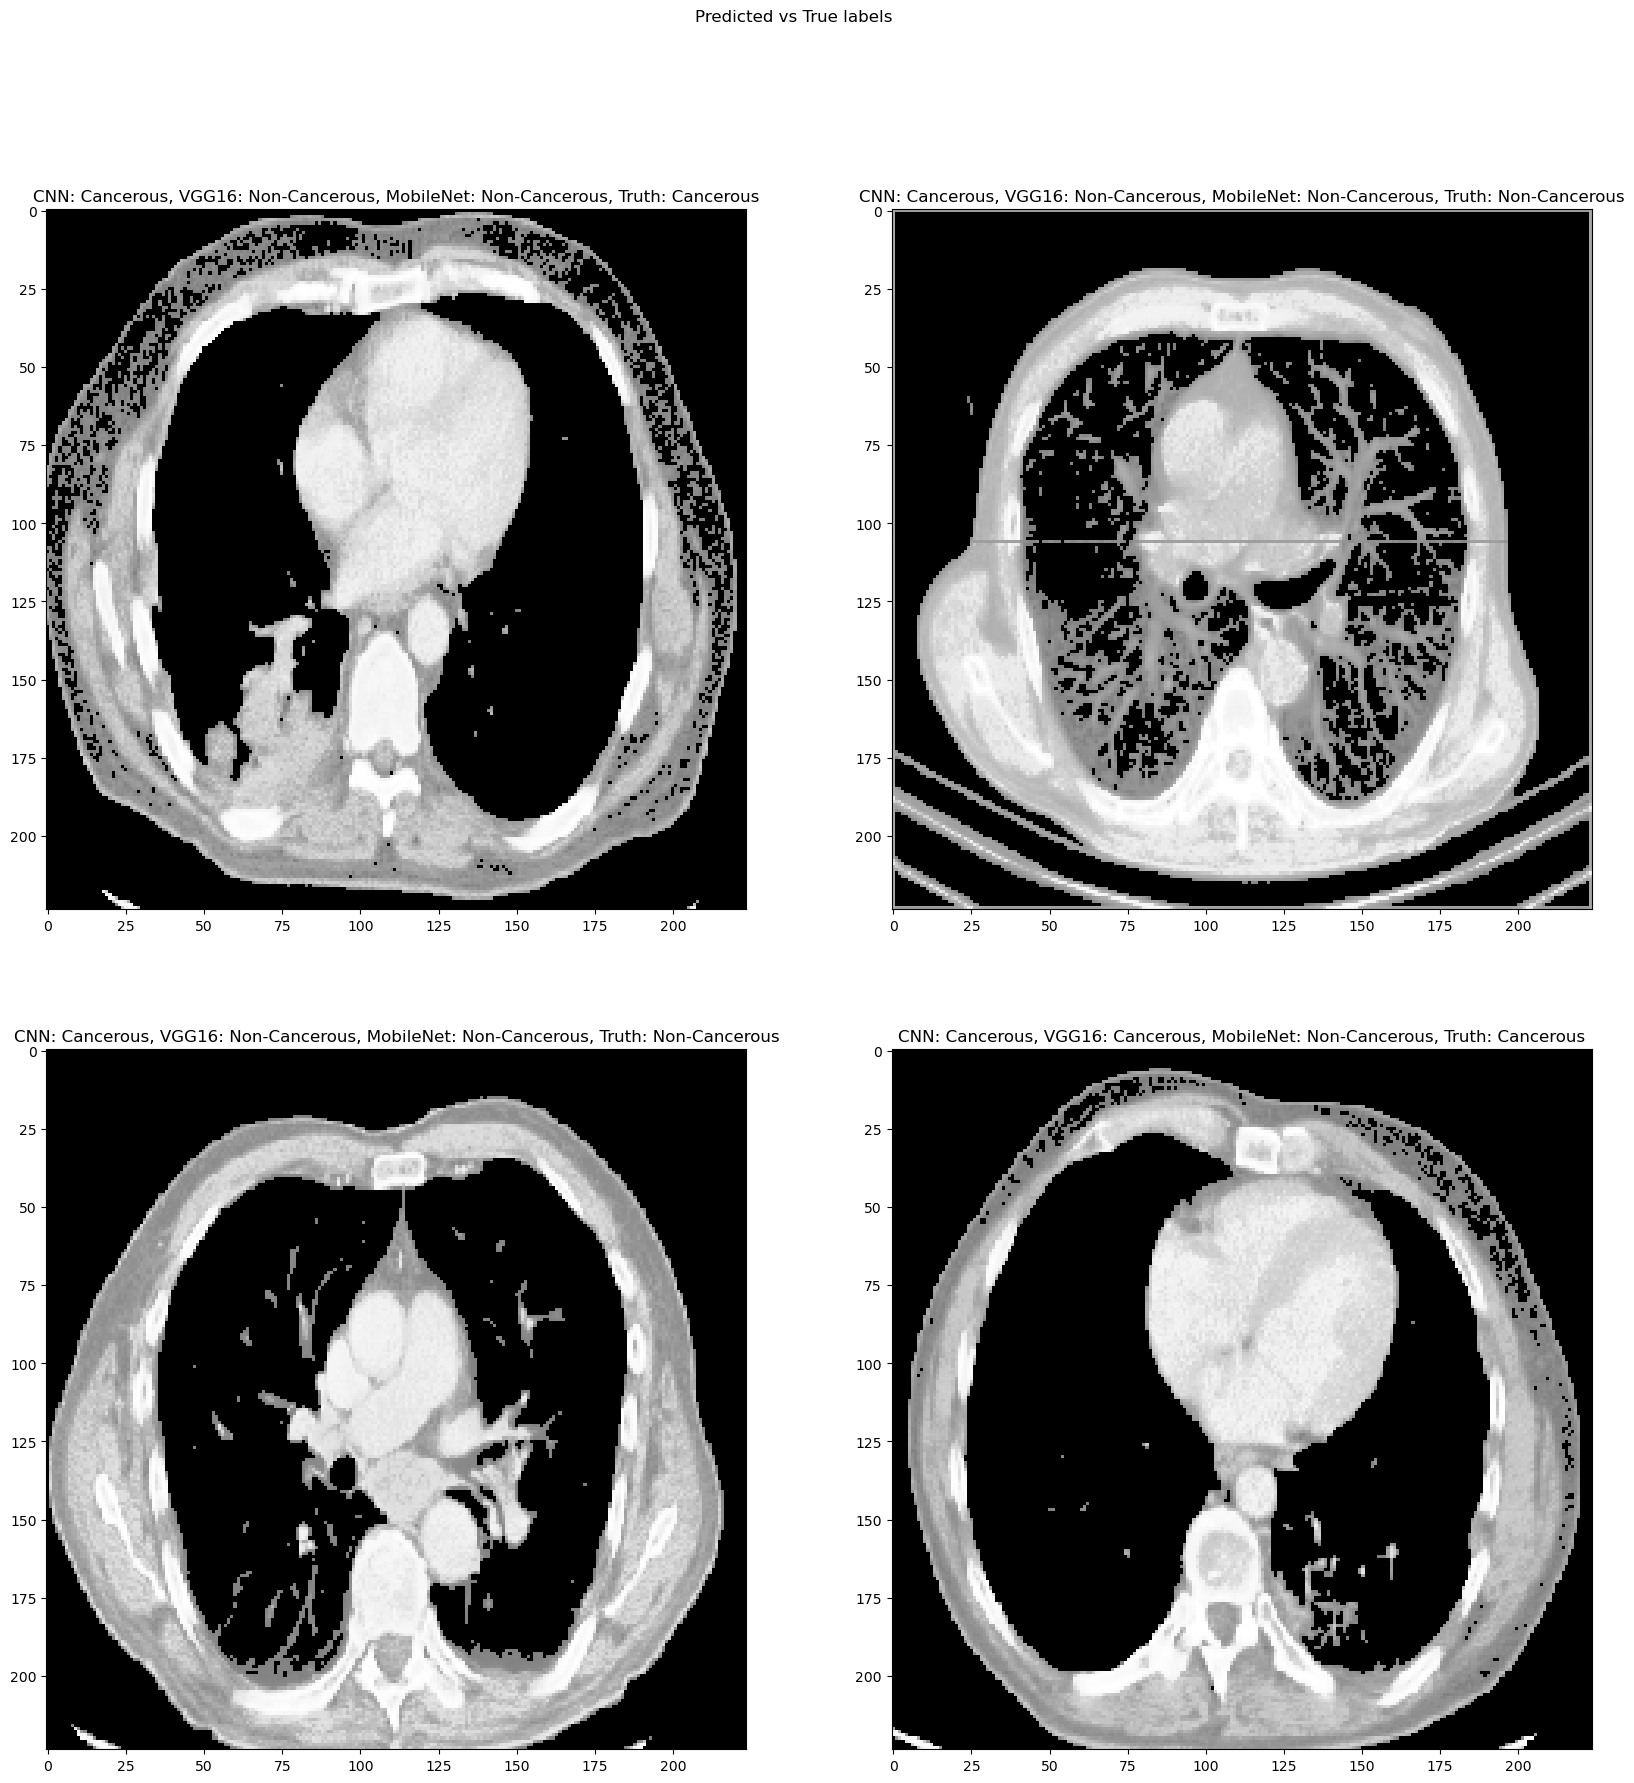

In [19]:
batch = next(test_dataset)

def predAll(batch, i):
  label_dict = {0: 'Cancerous', 1: 'Non-Cancerous'}
  cnnPred = 0 if CNN.predict(batch[0][i].reshape(-1, 224, 224, 3)) < 0.5 else 1
  vgg16Pred = 0 if VGG16.predict(batch[0][i].reshape(-1, 224, 224, 3)) < 0.5 else 1
  mobilenetPred = 0 if MOBILENET.predict(batch[0][i].reshape(-1, 224, 224, 3)) < 0.5 else 1
  return f'CNN: {label_dict[cnnPred]}, VGG16: {label_dict[vgg16Pred]}, MobileNet: {label_dict[mobilenetPred]}, Truth: {label_dict[int(batch[1][i])]}'


plt.figure(figsize=(20, 20))

ax1 = plt.subplot(2, 2, 1)
plt.imshow(batch[0][0])
label = predAll(batch, 0)
ax1.set_title(label)


ax2 = plt.subplot(2, 2, 2)
plt.imshow(batch[0][5])
label = predAll(batch, 1)
ax2.set_title(label)
ax3 = plt.subplot(2, 2, 3)
plt.imshow(batch[0][2])
label = predAll(batch, 31)
ax3.set_title(label)

ax4 = plt.subplot(2, 2, 4)
plt.imshow(batch[0][3])
label = predAll(batch, 30)
ax4.set_title(label)

plt.suptitle('Predicted vs True labels')
plt.show()

In [81]:
indices = ['CNN', 'VGG16','MobileNet']
scores = pd.DataFrame({'loss': [item[1] for item in eval],'accuracy': [item[2] for item in eval]}, index=indices)
scores

IndexError: index 2 is out of bounds for axis 0 with size 2

In [77]:
eval = [CNN_scores, VGG16_scores,MOBILENET_scores]
eval

[[0.10533933341503143, 0.9752475023269653],
 [0.09785906225442886, 0.9801980257034302],
 [0.06736790388822556, 0.9900990128517151]]

In [78]:
eval = np.array(eval)
np.savetxt('eval.txt', eval)